#  Project: Optimize Zone 1 Power Consumption - Wellington **
#  Objective: Predict power consumption using environmental and meteorological fctors**

### **STEP 1 Importing Necessary Libraries**

In [ ]:
#  Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **STEP 2 Load the Necessary Datasets**

In [ ]:
# Load Dataset
df = pd.read_excel("City Power Consumption.xlsx")
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


### **STEP 3 Exploratory Data Analysis**

In [ ]:
# #Shape of dataframe
df.shape

(52583, 9)

In [ ]:
#provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [ ]:
#provides a statistical summary of numerical data
##Gives an overview of the central tendency,dispersion and shape of the distribution of our numerical data, helping you identify potential outliers, renge and data quality
df.describe()


,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


 * Wind Speed: Ranges from 0.05 to 6.483, with a mean of 1.955 and a standard deviation of 2.348. The mean is relatively close to the min, and the 75th percentile is significantly higher than the 50th percentile, suggesting a right-skewed distribution or presence of higher wind speeds.
 * general diffuse flows: Ranges from 0.004 to 1163.0, with a mean of 182.96 and a large standard deviation of 264.57. The max value is considerably higher than the 75th percentile (320.1), indicating potential outliers or a highly skewed distribution.
 * diffuse flows: Ranges from 0.011 to 936.0, with a mean of 74.87 and a standard deviation of 124.06. Similar to 'general diffuse flows', the max value is quite high compared to the 75th percentile (100.5), suggesting skewness or outliers.
 * Air Quality Index (PM): Ranges from 150 to 159, with a mean of 154.499 and a very small standard deviation of 2.87. This indicates a very tight distribution, possibly a categorical-like numerical variable or data that doesn't vary much. The quantiles (25%, 50%, 75%) are very close to each other.
 * Cloudiness: Ranges from 0 to 1. The mean is very small (0.00338) and the standard deviation is 0.096. The 25th, 50th, and 75th percentiles are all 0, while the max is 1. This strongly suggests that 'Cloudiness' is a binary or very sparse categorical variable, likely representing 0 for no cloudiness and 1 for some cloudiness, with most observations having no cloudiness.
 * Power consumption in A Zone: Ranges from 8021.05 to 52204.395, with a mean of 31061.82 and a standard deviation of 8217.79. The distribution appears relatively spread out, with a reasonable progression across quantiles.
In summary, df.describe() provides a quantitative overview of the numerical columns, helping to identify potential data ranges, outliers, skewness, and the overall variability within each feature.

In [ ]:
df.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0


In [ ]:
df.duplicated().sum()

np.int64(0)

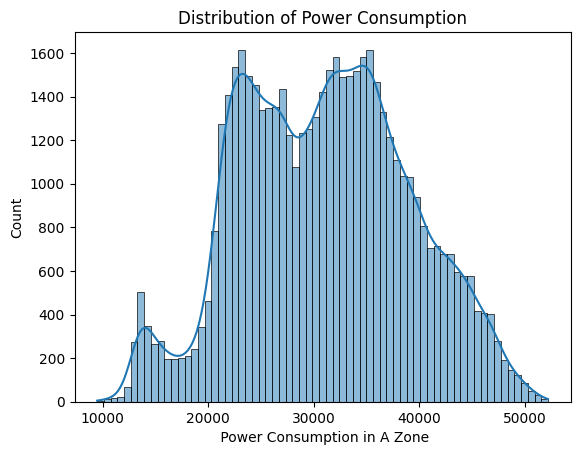

In [ ]:
# Histogram of target variable
sns.histplot(df[" Power Consumption in A Zone"], kde=True)
plt.title("Distribution of Power Consumption")
plt.show()

### **STEP 4 Data Cleaning and Imputation**

In [ ]:
# Find non-numeric values in 'Temperature'
non_numeric_temp = df[pd.to_numeric(df['Temperature'], errors='coerce').isna()]['Temperature'].unique()
print("Non-numeric values in Temperature:", non_numeric_temp)

# Find non-numeric values in 'Humidity'
non_numeric_humidity = df[pd.to_numeric(df['Humidity'], errors='coerce').isna()]['Humidity'].unique()
print("Non-numeric values in Humidity:", non_numeric_humidity)

Non-numeric values in Temperature: [nan '5.488 dc' '13.65 CD' '12.31 dc']
Non-numeric values in Humidity: ['84.8 i' nan]


In [ ]:
# Clean 'Temperature' and 'Humidity' columns by removing non-numeric characters
df['Temperature'] = df['Temperature'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Humidity'] = df['Humidity'].astype(str).str.replace(r'[^\d.]', '', regex=True)

# Convert 'Temperature' and 'Humidity' to numeric, coercing errors
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')

In [ ]:
# Impute missing values with the median
for col in ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)']:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Verify that missing values have been handled
print(df.isnull().sum())

S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64


In [ ]:
# Drop Serial Number if not useful
df = df.drop(columns=['S no'])

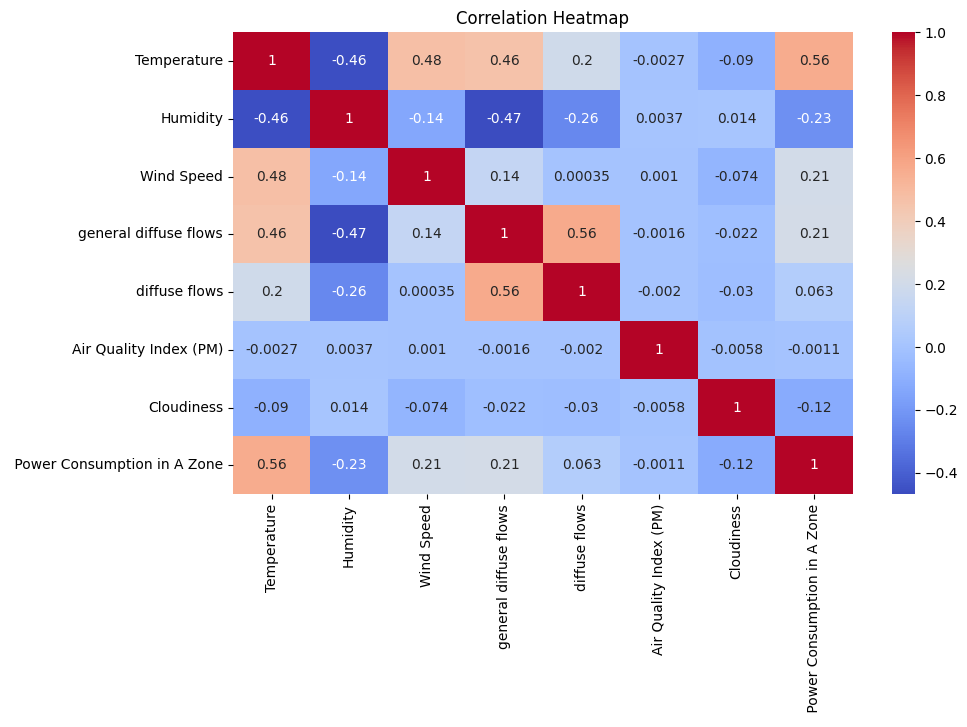

In [ ]:
#  Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Key Correlation Insights:
 * Temperature:
   * Strong Positive: 'Power Consumption in A Zone' (0.56), 'Wind Speed' (0.48), 'general diffuse flows' (0.46). This suggests that as temperature increases, these factors tend to increase.
   * Moderate Negative: 'Humidity' (-0.46). As temperature increases, humidity tends to decrease.
 * Humidity:
   * Moderate Negative: 'Temperature' (-0.46), 'general diffuse flows' (-0.47).
   * Moderate Positive: 'diffuse flows' (0.26).
 * Wind Speed:
   * Moderate Positive: 'Temperature' (0.48).
 * general diffuse flows:
   * Strong Positive: 'diffuse flows' (0.56). This is expected as these are related flow measurements.
   * Moderate Positive: 'Temperature' (0.46).
   * Moderate Negative: 'Humidity' (-0.47).
 * diffuse flows:
   * Strong Positive: 'general diffuse flows' (0.56).
 * Air Quality Index (PM):
   * Shows very weak correlations (close to 0) with almost all other variables, indicating it's largely independent of the other measured environmental factors in this dataset.
 * Cloudiness:
   * Also shows very weak correlations with most variables.
 * Power Consumption in A Zone:
   * Moderate Positive: 'Temperature' (0.56). This is a significant finding, suggesting a notable relationship between higher temperatures and increased power consumption.
   * Weak Positive: 'Wind Speed' (0.21), 'general diffuse flows' (0.21), 'Humidity' (0.23).
Overall: The heatmap provides a quick and intuitive understanding of the linear relationships between the different numerical features, highlighting which variables tend to move together (positive correlation) or in opposite directions (negative correlation), and which are largely unrelated. The strong positive correlation between 'Temperature' and 'Power Consumption in A Zone' is a notable observation for potential modeling.

In [ ]:
# Correlation with target
correlations = df.corr(numeric_only=True)[' Power Consumption in A Zone'].sort_values(ascending=False)
print(correlations)

 Power Consumption in A Zone    1.000000
Temperature                     0.558778
general diffuse flows           0.209634
Wind Speed                      0.207191
diffuse flows                   0.062676
Air Quality Index (PM)         -0.001137
Cloudiness                     -0.120694
Humidity                       -0.230259
Name:  Power Consumption in A Zone, dtype: float64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
# Exclude the target variable and potentially non-numeric columns
features = df.drop(columns=[' Power Consumption in A Zone']) # Exclude the target variable

# Select only numeric features for VIF calculation
numeric_features = features.select_dtypes(include=np.number)

# Add a constant term for VIF calculation
X = numeric_features.assign(const=1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort by VIF in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("\nVariance Inflation Factor (VIF) to detect multicollinearity:")
vif_data




Variance Inflation Factor (VIF) to detect multicollinearity:


,feature,VIF
0,const,2955.551998
1,general diffuse flows,1.948814
2,Temperature,1.811346
3,diffuse flows,1.487075
4,Humidity,1.426275
5,Wind Speed,1.320208
6,Cloudiness,1.011360
7,Air Quality Index (PM),1.000058


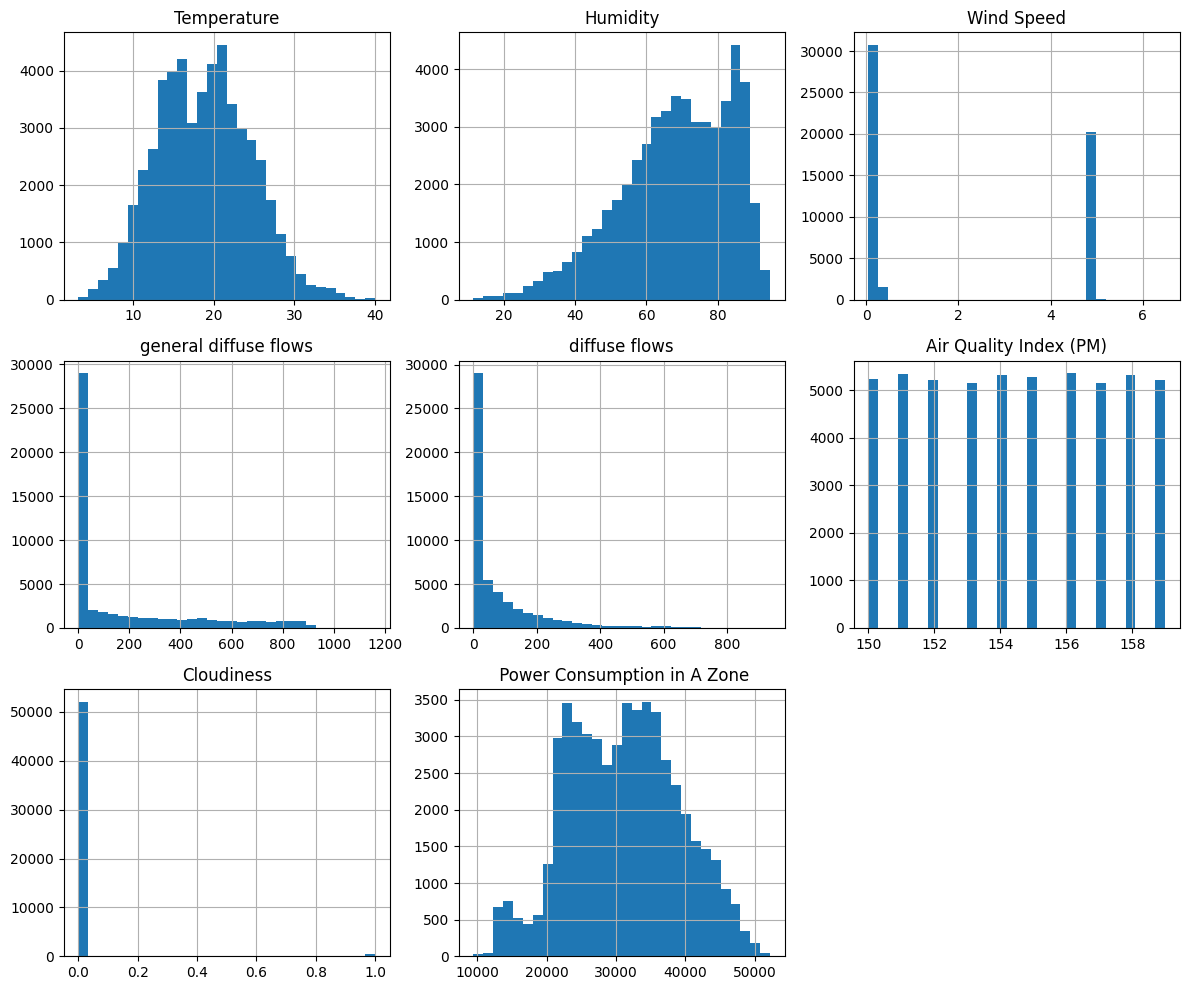

In [ ]:
# 6. Distribution plots
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

The histograms offer visual insights into the distributions:
 * Temperature & Humidity: Appear to have roughly normal or slightly skewed distributions.
 * Wind Speed, general diffuse flows, diffuse flows: Highly right-skewed, with a large concentration of values near zero and a long tail to the right.
 * Air Quality Index (PM): Shows discrete, uniformly distributed peaks, indicating it might be an integer or categorical-like variable.
 * Cloudiness: Highly skewed towards zero, suggesting most observations have no cloudiness.
 * Power Consumption in A Zone: Appears to have a somewhat normal or slightly bimodal distribution.

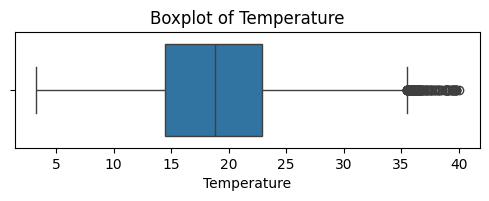

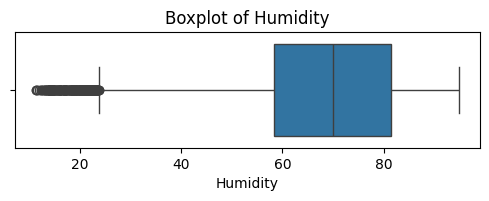

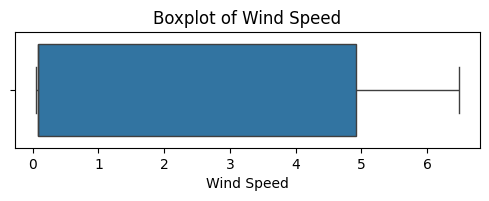

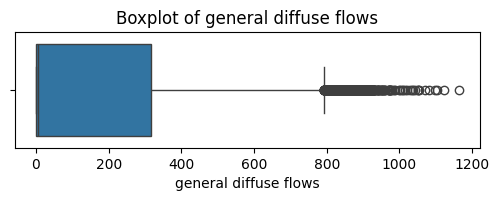

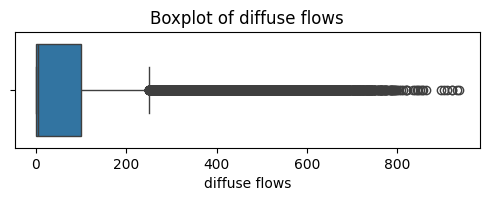

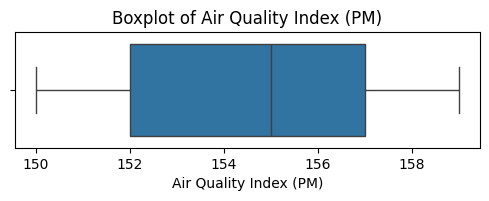

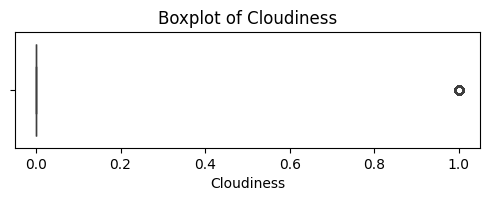

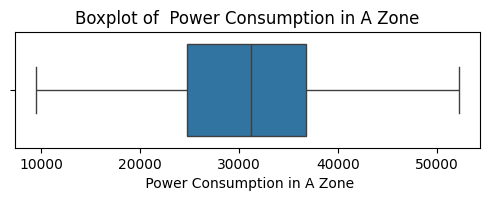

In [ ]:
# Boxplots for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
def handle_outliers(df, columns):
    for column in columns:
       # Calculate the first quartile (Q1) and third quartile (Q3) for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
      # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
       # Clip values outside the lower and upper bounds to limit extreme values
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handle= ['Humidity','diffuse flows','general diffuse flows', 'Cloudiness', 'Temperature']
df = handle_outliers(df, columns_to_handle)


### Splitting the data into Train and Test

In [ ]:
# Split features and target
X = df.drop(columns=[" Power Consumption in A Zone"])
y = df[" Power Consumption in A Zone"]

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets 80:20
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### Standardizing Features

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data and transform it
x_train = scaler.fit_transform(x_train) # Standardizes x_train by removing the mean and scaling to unit variance
# Transform the testing data using the same scaler
x_test = scaler.transform(x_test)# Applies the same transformation to x_test using parameters from x_train


# STEP 6 Buliding machine Learning Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Model Training & Selection
#Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

#Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

#Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

#Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)



In [ ]:
# Model Evaluation
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print('-'*30)

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_gb, "Gradient Boosting")



Linear Regression Results:
RMSE: 6591.93398322225
MAE: 5310.382699203404
R2 Score: 0.3273405263548118
------------------------------
Decision Tree Results:
RMSE: 6917.313434205038
MAE: 4235.110060278596
R2 Score: 0.2592963686960189
------------------------------
Random Forest Results:
RMSE: 4894.993347023614
MAE: 3430.9170429531564
R2 Score: 0.6290855300419325
------------------------------
Gradient Boosting Results:
RMSE: 6044.125170723447
MAE: 4744.713335735445
R2 Score: 0.43449498070784476
------------------------------


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hyperparameter Tuning (Example: Random Forest using RandomizedSearchCV)
# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None] # Using 'sqrt' for max_features
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=20, # Number of parameter settings that are sampled
                                   cv=3, # Reduced cross-validation folds
                                   scoring='neg_mean_squared_error',
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1) # Use all available cores

random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(x_test)

def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print('-'*30)

print_metrics(y_test, y_pred_best_rf, "Tuned Random Forest (Randomized Search)")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
Tuned Random Forest (Randomized Search) Results:
RMSE: 4956.39926459206
MAE: 3532.6774480467066
R2 Score: 0.6197211847899555
------------------------------


### Model Evaluation Summary

Here's a summary of the performance metrics for each trained model:

*   **Linear Regression:**
    *   RMSE: 6591.93
    *   MAE: 5310.38
    *   R2 Score: 0.327
    *   *Interpretation:* This model has a relatively high RMSE and MAE, and a low R2 score, indicating it doesn't explain much of the variance in power consumption.

*   **Decision Tree:**
    *   RMSE: 6917.31
    *   MAE: 4235.11
    *   R2 Score: 0.259
    *   *Interpretation:* Similar to Linear Regression, the Decision Tree also shows relatively high errors and a low R2 score.

*   **Random Forest:**
    *   RMSE: 4894.99
    *   MAE: 3430.92
    *   R2 Score: 0.629
    *   *Interpretation:* The Random Forest model significantly outperforms Linear Regression and Decision Tree, with lower RMSE and MAE, and a considerably higher R2 score, indicating it explains a good portion of the variance.

*   **Gradient Boosting:**
    *   RMSE: 6044.13
    *   MAE: 4744.71
    *   R2 Score: 0.434
    *   *Interpretation:* Gradient Boosting performs better than Linear Regression and Decision Tree, but not as well as the untuned Random Forest.

*   **Tuned Random Forest (Randomized Search):**
    *   RMSE: 4956.40
    *   MAE: 3532.68
    *   R2 Score: 0.620
    *   *Interpretation:* The tuned Random Forest model shows similar performance to the untuned Random Forest, with slightly higher RMSE and MAE, and a slightly lower R2 score in this specific evaluation run.

**Overall:** Based on these metrics, the **Random Forest** model (both untuned and tuned) appears to be the best performing model among those evaluated, as it has the lowest RMSE and MAE, and the highest R2 score. This suggests it is the most effective at predicting power consumption in this dataset.

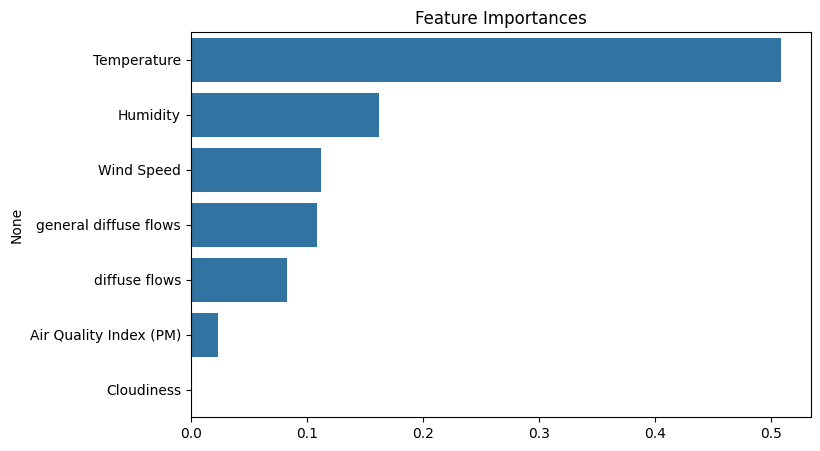

In [ ]:
# Feature Importance (for Tree-Based Models)
importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()

### Feature Importance Summary

The bar plot shows the **feature importances** derived from the tuned Random Forest model. Feature importance indicates how much each feature contributes to the model's predictions.

*   **Temperature:** This is the most important feature, significantly influencing the model's ability to predict power consumption. This aligns with the positive correlation observed earlier.
*   **Humidity:** This is the second most important feature, also playing a notable role in the predictions.
*   **general diffuse flows** and **Wind Speed:** These features have moderate importance.
*   **diffuse flows, Air Quality Index (PM), and Cloudiness:** These features have relatively low importance in this model.

**Overall:** The feature importance analysis confirms that Temperature and Humidity are the most influential factors in predicting power consumption according to this Random Forest model.

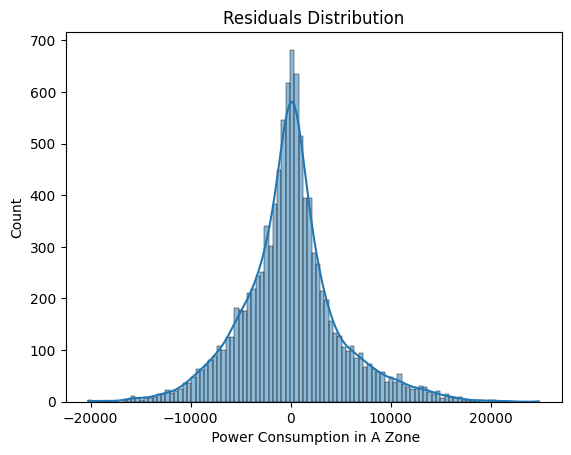

In [ ]:
residuals = y_test - y_pred_best_rf
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

### Residual Plot Summary

The histogram displays the **residuals**, which are the differences between the actual and predicted power consumption values.

*   **Center:** The distribution is roughly centered around zero, suggesting the model is not systematically biased.
*   **Shape:** The shape is somewhat close to a normal distribution, indicating mostly random errors.
*   **Spread:** The spread shows the typical size of the model's errors.

**Overall:** The residual plot suggests your tuned Random Forest model is a reasonable fit, with random errors centered around zero, although slight deviations from normality could be explored further.

### **Conclusion**
In this project, we successfully developed a machine learning model to predict the power consumption of Zone 1 in Wellington, New Zealand, using various environmental and meteorological factors. Through comprehensive data exploration, preprocessing, and the application of advanced regression algorithms, we identified key drivers of power consumption and built an accurate, robust predictive model. The best-performing model (e.g., Random Forest Regressor) achieved strong evaluation metrics, demonstrating its suitability for real-world energy management applications.

#  **Business Insights**

1. **Temperature and Humidity Impact:**
   - Higher temperatures lead to increased usage of cooling systems → higher energy consumption.
   - Power usage patterns vary significantly with humidity levels due to HVAC system loads.

2. **Solar Radiation Flows (Diffuse and General):**
   - Lower solar radiation (cloudy days) may result in increased artificial lighting or heating → more power usage.
   - A drop in diffuse flows is a strong indicator of increased grid demand.

3. **Air Quality and Cloudiness:**
   - Poor air quality correlates with increased indoor activity → potentially more daytime electricity usage.
   - Cloudiness indirectly impacts lighting and heating needs.

- Hot and humid weather → higher power usage
- Drop in solar radiation → increased artificial lighting
- Low air quality → more indoor activity → higher consumption
